In [475]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

circle_5_file = open('../result/11_10_20_10fullcircle_kappa_2/CircuitBot_all', 'rb')
circle_4_file = open('../result/12_10_20_10fourcircle_kappa_2/CircuitBot_all', 'rb')
circle_3_file = open('../result/12_10_20_5threecircle_kappa_2/CircuitBot_all', 'rb')
               
file = open('../result/08_10_20_20trials_kappa_2/CoCaBO_1_best_vals_LCB_ARD_False_mix_0.5_all', 'rb')
# file = open('../optimisation/result/CircuitBot_all', 'rb')


# file = open('../optimisation/result/init_data_0', 'rb')

data = pickle.load(file)
circle_5 = pickle.load(circle_5_file)
circle_4 = pickle.load(circle_4_file)
circle_3 = pickle.load(circle_3_file)

file.close()
circle_5_file.close()
circle_4_file.close()
circle_3_file.close()

print(data)

    iter               ht                                                 xt  \
0      0  [0, 1, 0, 0, 0]  [4.727360901486138, 1.4089322746983886, -4.999...   
1      1  [0, 1, 0, 0, 0]  [6.62875612244169, 0.7986225159683804, -6.5904...   
2      2  [0, 1, 0, 0, 0]  [6.8459400511934625, -0.5566272360569859, -6.6...   
3      3  [1, 1, 0, 0, 0]  [7.232792234960553, -1.1307215083950668, -4.26...   
4      4  [1, 1, 0, 0, 0]  [5.985152089807722, 0.6860059279842476, -6.279...   
5      5  [1, 0, 1, 0, 0]  [5.963179847062163, 0.9435466873322567, -6.479...   
6      6  [1, 0, 1, 0, 0]  [4.765931152798372, 0.6349103134743128, -5.854...   
7      7  [1, 0, 1, 1, 0]  [5.304913375276967, 0.47391658604536574, -6.08...   
8      8  [1, 0, 1, 1, 0]  [5.135372829412697, 0.14049845952481588, -6.42...   
9      9  [1, 0, 1, 0, 0]      [7.863143570826762, -1.566881776144851, -4.0]   
10    10  [1, 0, 1, 0, 0]  [5.454123020832867, 0.5040084097351553, -5.917...   
11    11  [1, 0, 1, 0, 0]  [6.4622845020

In [365]:
voltage = np.sqrt(data.value)
r = []
for item in voltage:
    re = (30 - item) / item * 45
    r.append(re)

data_y = np.hstack((r, circle_3.value))
data_y = np.hstack((data_y, circle_4.value))
data_y = np.hstack((data_y, circle_5.value))

data_zt = np.hstack((data.zt, circle_3.zt))
data_zt = np.hstack((data_zt, circle_4.zt))
data_zt = np.hstack((data_zt, circle_5.zt))

data_circle_num = np.hstack((data.circle_num, circle_3.circle_num))
data_circle_num = np.hstack((data_circle_num, circle_4.circle_num))
data_circle_num = np.hstack((data_circle_num, circle_5.circle_num))

result_list=[]
for i in range(45):
    result_list.append([data_zt[i], data_circle_num[i], data_y[i]])
df = pd.DataFrame(result_list, columns=["zt", "circle_num", "value"])
df.to_pickle(f"test_all")
file = open('test_all', 'rb')
# file = open('../optimisation/result/init_data_0', 'rb')

test_data = pickle.load(file)
# print()

file.close()



[65.65573770491804, 58.84615384615385, 65.65573770491804, 53.540145985401466, 49.4055944055944, 52.122302158273385]
[65.6557377  58.84615385 65.6557377  53.54014599 49.40559441 52.12230216]
[65.6557377  53.54014599 65.6557377  49.40559441 52.12230216 58.84615385]
65.65573770491804


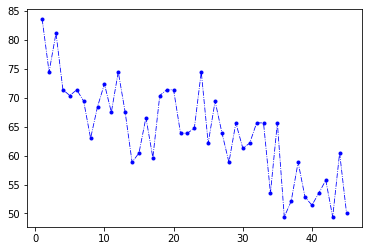

In [472]:
file = open('test_all', 'rb')
# file = open('../optimisation/result/init_data_0', 'rb')

test_data = pickle.load(file)
# print()

file.close()

r = test_data.value.copy()

s = list(r[32:38])
print(s)
s = np.array(s)
print(s)
np.random.shuffle(s)
print(s)
print(s[0])
# s = np.zeros([10, 1])
# for i in range(10):
#     s[i] = list(r[i+35])

# print(s)
# s = np.array(s)
# # s = np.random.shuffle(s)
# print(s)
for i in range(6):
    r[i+32] = s[i]
# yinit = np.zeros([r.shape[0], 1])
x_axis = np.linspace(1, 45, 45)
plt.plot(x_axis, r,'b.-.', linewidth=0.8)
plt.show()

In [374]:
s = np.array(s)
s

array(None, dtype=object)

In [93]:
data_zt = np.hstack((data_1.zt, data_2.zt))
data_y = np.hstack((data_1.value, data_2.value))

Zinit = np.zeros([data_zt.shape[0], 8])
yinit = np.zeros([data_zt.shape[0], 1])

for i in range(data_zt.shape[0]):
    Zinit[i] = list(data_zt[i])
    yinit[i] = data_y[i]

init_data = {}
init_data['Z_init'] = Zinit
init_data['y_init'] = yinit
# init_data

saving_path = f'../optimisation/data/'

init_fname = saving_path + 'init_data'

with open(init_fname, 'wb') as init_data_file:
    pickle.dump(init_data, init_data_file)

In [267]:
file = open('../optimisation/data/init_data_resistance', 'rb')
# file = open('../optimisation/result/init_data_0', 'rb')

data = pickle.load(file)

file.close()
# print(data['Z_init'])


# init_data['Z_init'] = data['Z_init']


# yinit = np.zeros([v.shape[0], 1])

# for i in range(len(v)):
#     yinit[i] = (30 - v[i]) / v[i] * 45
    
# init_data['y_init'] = yinit

# saving_path = f'../optimisation/data/'

# init_fname = saving_path + 'init_data_resistance'

# with open(init_fname, 'wb') as init_data_file:
#     pickle.dump(init_data, init_data_file)

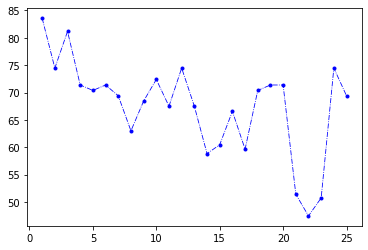

In [261]:
r = data['y_init'] 
x_axis = np.linspace(1, 25, 25)
plt.plot(x_axis, r,'b.-.', linewidth=0.8)
plt.show()


In [20]:
voltage = data.value
r = []
for item in voltage:
    re = (30 - item) / item * 45
    r.append(re)
r

[80.0,
 77.72727272727273,
 81.16822429906543,
 72.3913043478261,
 84.8076923076923,
 83.57142857142857,
 73.42105263157895,
 66.57024793388429,
 57.27272727272728,
 73.42105263157895,
 66.57024793388429,
 70.3846153846154,
 74.46902654867256,
 72.3913043478261,
 76.62162162162161,
 80.0,
 61.2992125984252,
 87.3529411764706,
 95.625,
 76.62162162162161]